In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

helth_df = pd.read_csv("data.csv")
total_countries =helth_df.groupby(['Indicator Name']).sum(["1960"]).sort_values(["1960"],ascending=False)
total_countries = total_countries.T.iloc[15:]
only_hp_params = total_countries[['% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
                                  'Literacy rate, adult male (% of males ages 15 and above)','Urban population','Rural population']][:-1]

Basic Template for a possible dual axis chart that I stole (kinda).

Taking the original CSV and tried to organize it, Data did not isolate only the columns I wanted at first kept trying to filter out null data, was just erasing everything. Kept it at this state.

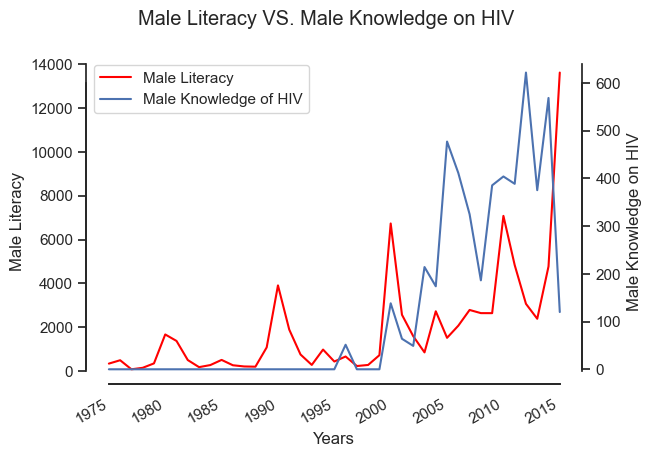

In [49]:
#Creating a separate list for each axis. getting the data from the DF.
knowledge = only_hp_params['% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)'].tolist()
male_literacy = only_hp_params['Literacy rate, adult male (% of males ages 15 and above)'].tolist()
years = only_hp_params.index.tolist()


#create a figure and the main plot
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.suptitle('Male Literacy VS. Male Knowledge on HIV')

#Create the X axis and left Y axis.
ax.plot(years, male_literacy,color='red', label='Male Literacy')
ax.set_ylabel('Male Literacy')
ax.set_xlabel('Years')
ax.set_xticks(list(range(0,len(years)+1,5)))

#Create the right Y axis.
ax_twin = ax.twinx()
ax_twin.plot(years, knowledge, label='Male Knowledge of HIV')
ax_twin.set_ylabel('Male Knowledge on HIV')
ax_twin.set_yticks(knowledge)
ax_twin.set_yticks(list(range(0, len(knowledge)+1,10)))
ax_twin.set_yscale('linear')

#Create legends.
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax_twin.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=2)

sns.set_theme()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.5})
sns.set_style("white")
sns.despine(right=False, trim=True)


